# Nanodegree Machine Learning Engenieer

# Definição

Começando com uma análise mais aprofundada do conjunto de dados, tentaremos entender o conjunto de dados em mais detalhes. Como 'compressive_strength' é a variável mais importante no conjunto de dados, exploraremos a correlação de 'compressive_strength' com outras variáveis. Na primeira parte deste análise, vamos basicamente tentar entender os dados de forma mais profunda e visualizar de maneira apropriada, explorando os dados e visualizando atráves dos gráficos.

## Importação das bibliotecas

In [263]:
# Importando todas as dependências requiridas para esse projeto.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

## Carregamento dos dados

In [127]:
# Carregando os dados
data = pd.read_excel("concrete.xls")
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# Análises

## Preparação e exploração dos dados

In [128]:
#renomeando colunas
data = data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

In [129]:
# Vamos ver todas as colunas do conjunto de dados de maneira mais clara:
data.columns

Index(['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'age', 'compressive_strength'],
      dtype='object')

In [326]:
data.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                  1030 non-null float64
furnace_slag            1030 non-null float64
fly_ash                 1030 non-null float64
water                   1030 non-null float64
super_plasticizer       1030 non-null float64
coarse_agg              1030 non-null float64
fine_agg                1030 non-null float64
age                     1030 non-null int64
compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [131]:
# Verificando se existem valores missing no conjunto de dados.
print (data.isnull().sum())

cement                  0
furnace_slag            0
fly_ash                 0
water                   0
super_plasticizer       0
coarse_agg              0
fine_agg                0
age                     0
compressive_strength    0
dtype: int64


**Como podemos ver, o conjunto de dados inteiro não possui nenhum valor ausente. Portanto, não precisamos realizar nenhum tipo de tratamento de valor ausente aqui.**

In [132]:
# Dimensão dos dados
print("Número de linhasn :",data.shape[0])
print("Número de colunas :",data.shape[1])

Número de linhasn : 1030
Número de colunas : 9


In [133]:
# Visualizar alguns detalhes estatísticos básicos de um conjunto de dados ou uma série de valores numéricos.
data.describe()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# Visualização Exploratória

## Histograma para cada coluna

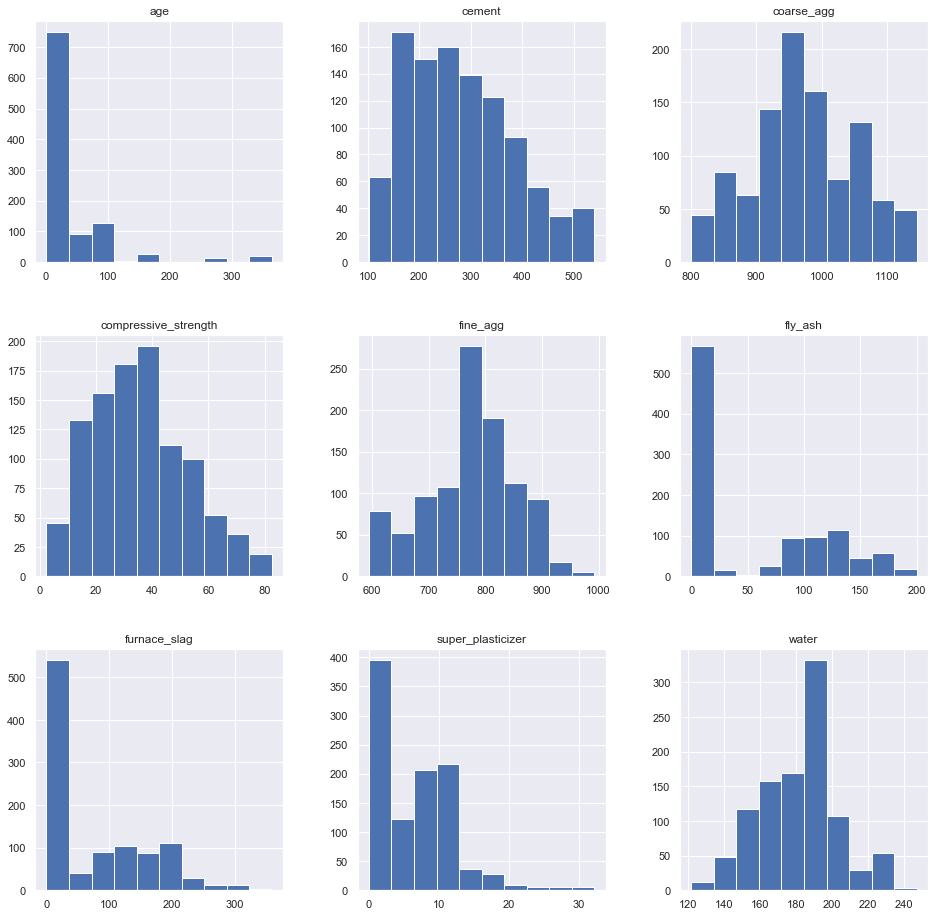

In [134]:
histograms = data.hist(figsize=(16, 16), bins=10)

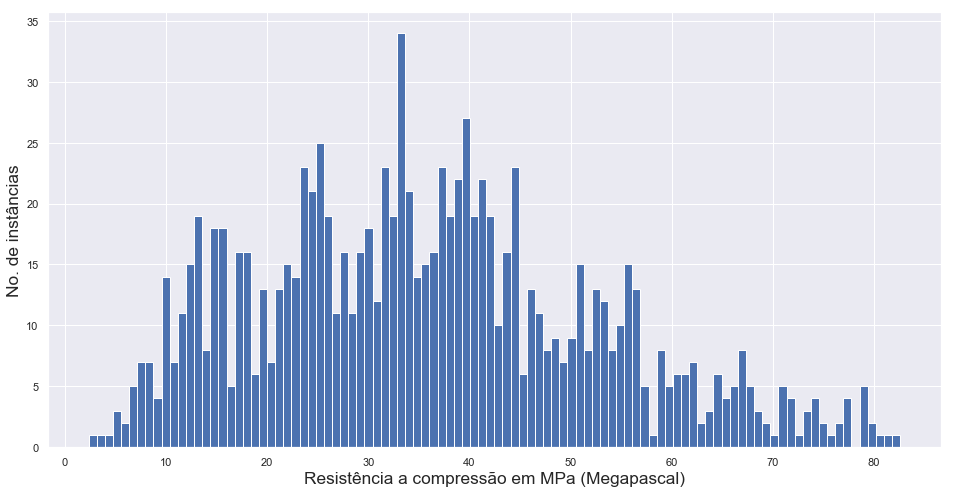

In [179]:
# Histograma para compressive_strength

plt.xlabel("Resistência a compressão em MPa (Megapascal)", fontsize="x-large")
plt.ylabel("No. de instâncias", fontsize="x-large")

data["compressive_strength"].hist(figsize=(16, 8), bins=100);

Outra importante avaliação é verificar se a nossa váriável escolhida como target, segue uma tendência normal, afim de facilitar a nossa predição.

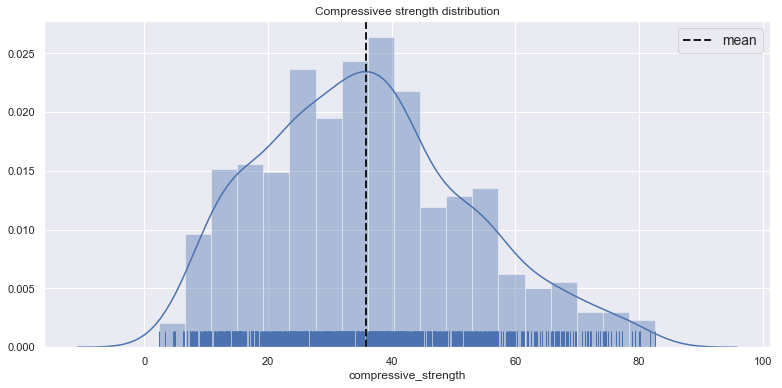

In [136]:
plt.figure(figsize=(13,6))
sns.distplot(data["compressive_strength"],color="b",rug=True)
plt.axvline(data["compressive_strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

Um gráfico de dispersão nos ajuda a entender distribuições discretas de cada recurso e nos fornece o coeficiente de correlação (Pearson).

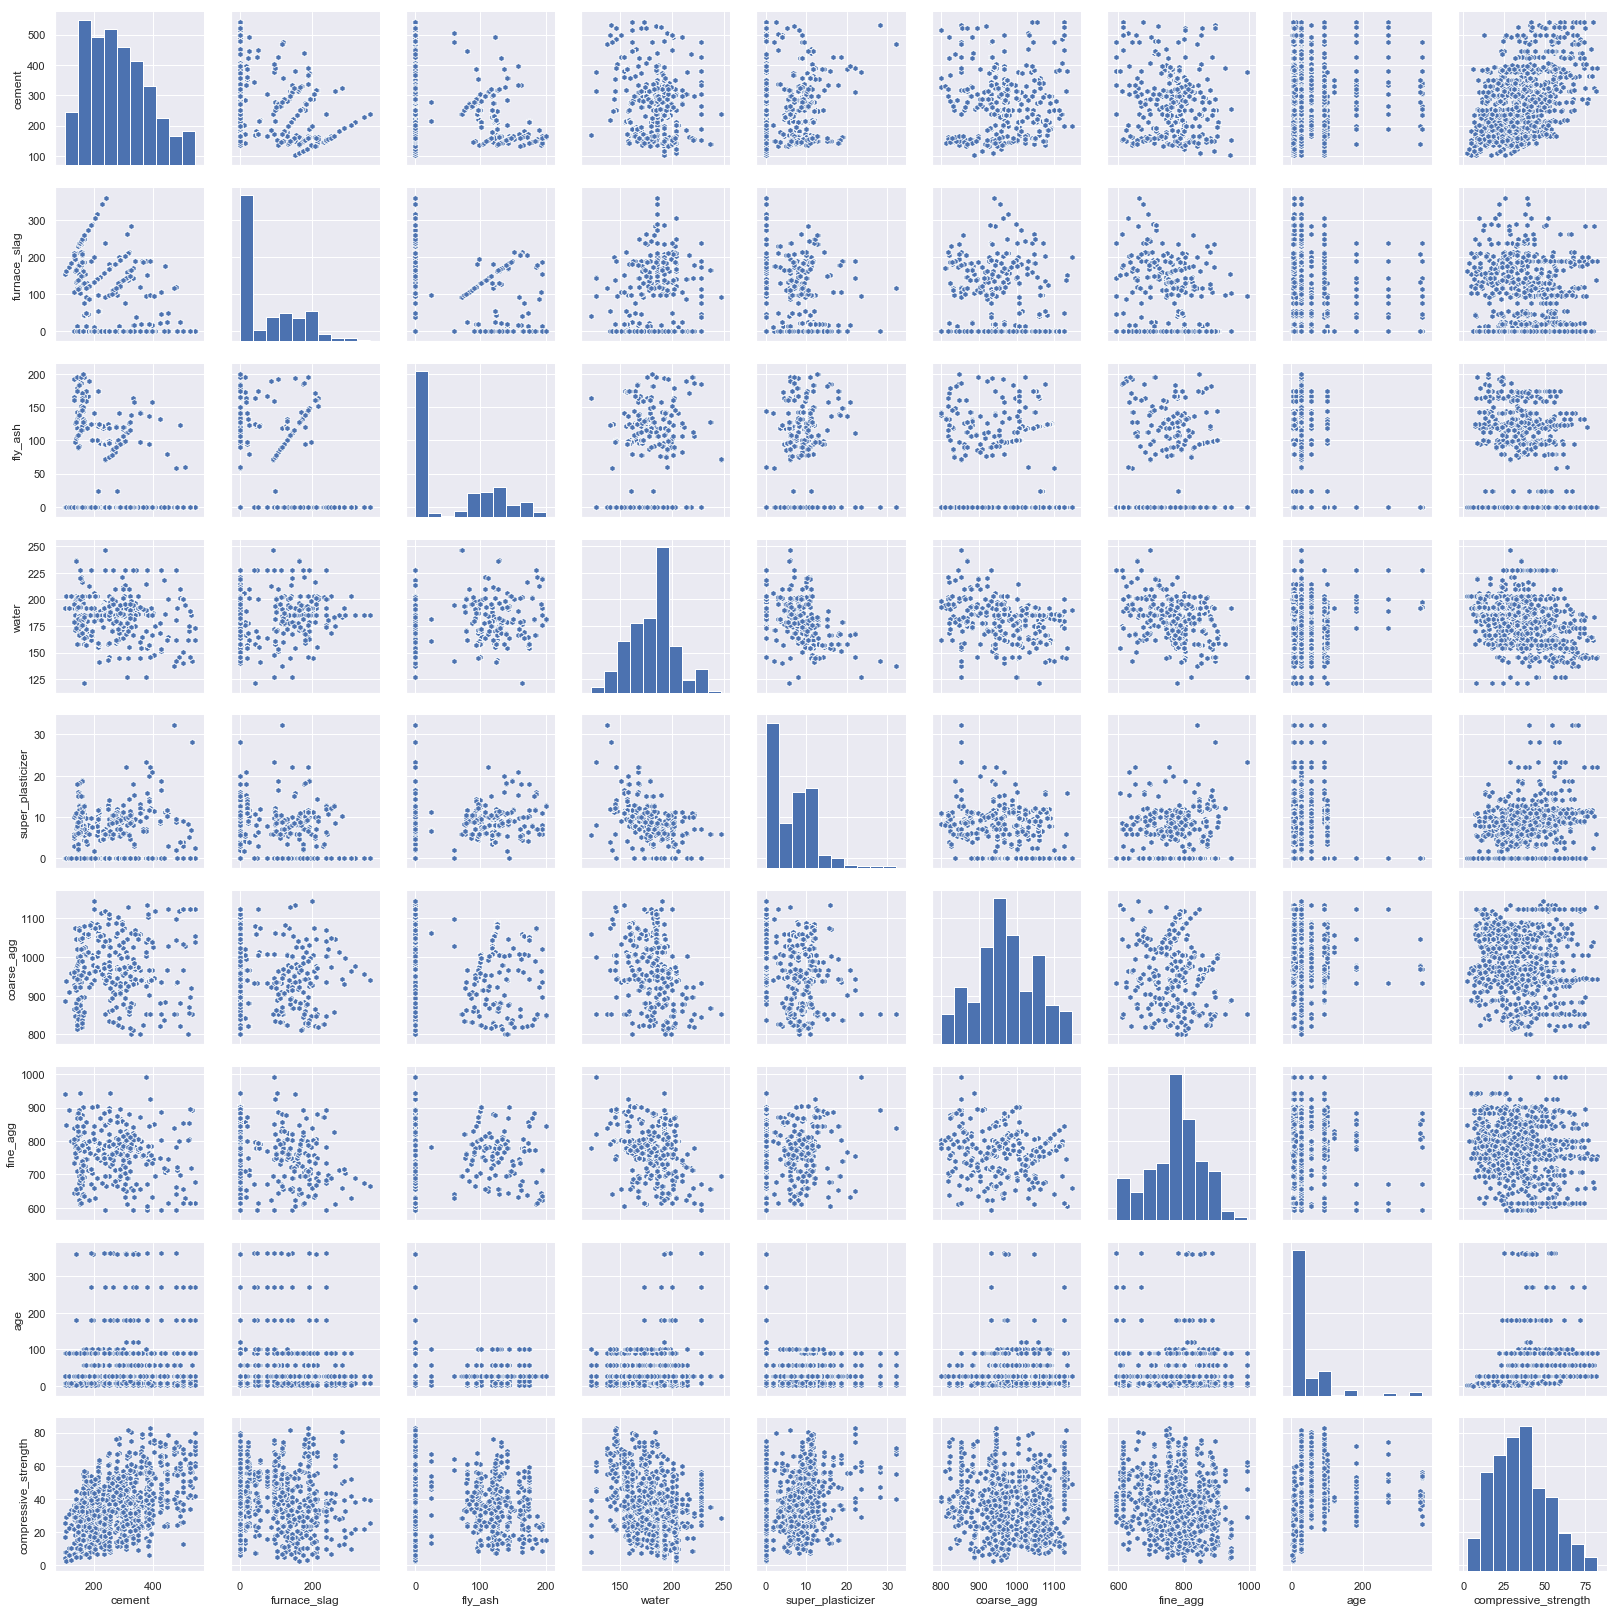

In [137]:
sns.pairplot(data,markers="h")
plt.show()

Pode-se observar através da ultima linha de gráficos que o valor do compressive_strength, apresenta uma leve tendência para uma regressão linear apenas quando comparado a quantidade da variável cement/cimento presente no concreto. O que faz sentido uma vez que o cimento é o maior responsável pelo ganho de resistência. Porém esse padrão não é observado quando comparado as outras colunas.

In [138]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(10, 'compressive_strength').index
columns

Index(['compressive_strength', 'cement', 'super_plasticizer', 'age',
       'furnace_slag', 'fly_ash', 'coarse_agg', 'fine_agg', 'water'],
      dtype='object')

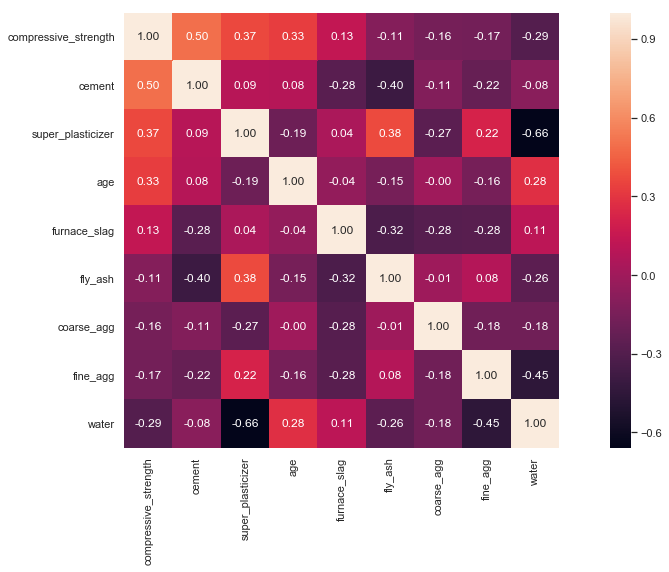

In [139]:
# Vamos plotar diagramas de heatplot para ver a correlação das variáveis sobre compressive_strength
plt.figure(figsize=(18, 8))
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

Quando falamos de concreto, temos que levar em consideração que para a sua produção depende de vários componentes envolvidos na mistura, mas olhando para o mapa de calor acima, existem algumas variáveis/componentes que são correlacionadas mais fortemente com a resistência de compressão, indicado pela nosso target **compressive_strength**, e são as variáveis 'cement', 'super_plasticizer e 'age' e a variável water tem um efeito negativo na resistência do concreto.

# Pré-processamento de dados

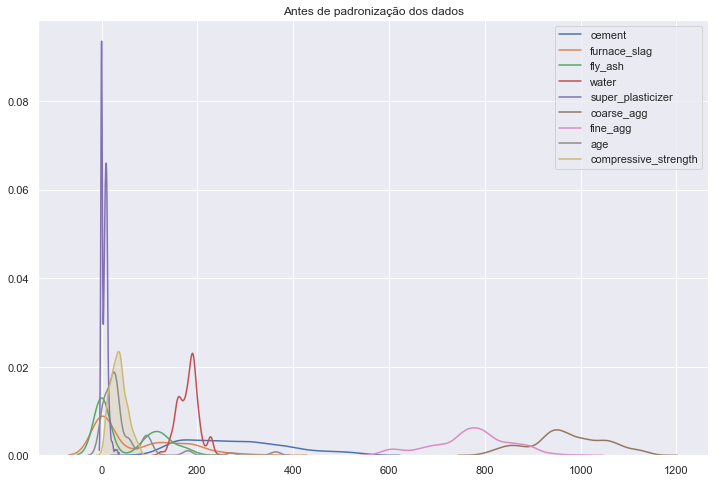

In [184]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.set_title('Densidade estimada do conjunto de dados')
ax1.set_title('Antes de padronização dos dados')
sns.kdeplot(data.iloc[:, 0], ax=ax1)
sns.kdeplot(data.iloc[:, 1], ax=ax1)
sns.kdeplot(data.iloc[:, 2], ax=ax1)
sns.kdeplot(data.iloc[:, 3], ax=ax1)
sns.kdeplot(data.iloc[:, 4], ax=ax1)
sns.kdeplot(data.iloc[:, 5], ax=ax1)
sns.kdeplot(data.iloc[:, 6], ax=ax1)
sns.kdeplot(data.iloc[:, 7], ax=ax1)
# shading the area below compressive strength (result)
sns.kdeplot(data.iloc[:, 8], ax=ax1, shade=True);

## Padronização, tornando os valores em alcance para facilitar a compilação

In [168]:
from sklearn import preprocessing
from IPython.display import display, HTML

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=data.columns)
display(HTML(scaled_df.head().to_html(index=False)))

cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753


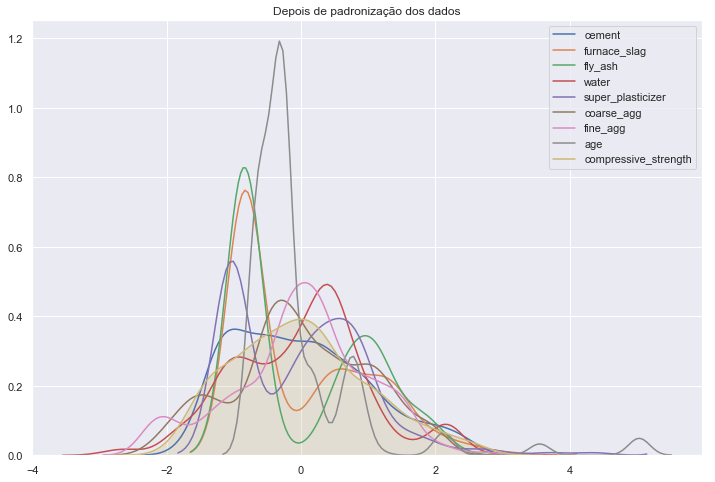

In [185]:
fig, ax2 = plt.subplots(figsize=(12, 8))
ax2.set_title('Depois de padronização dos dados')
sns.kdeplot(scaled_df.iloc[:, 0], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 1], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 2], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 3], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 4], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 5], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 6], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 7], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 8], ax=ax2, shade=True)

# Implementação

In [432]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

### Preparação dos dados

In [375]:
# Fazer uma cópia do DataFrame utilizando a função 'drop' removendo o atributo alvo.
X = scaled_df.drop(["compressive_strength"], axis=1, inplace = False)
y = scaled_df["compressive_strength"]

## Algoritmos e técnicas

### Dividindo os dados em conjuntos de treinamento

In [376]:
# Dividindo o conjunto de dados para treinamento e testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)    

## Linear Regression (Benchmark)

In [377]:
# cria o objeto regressor pata Linear regression
lr_reg = LinearRegression()

# Treina o modelo usando p conjunto de treinamento
lr_reg.fit(X_train,y_train)

# Usando o método predict nos dados de teste
lr_reg_pred = lr_reg.predict(X_test)

LR_R2   = metrics.r2_score(y_test, lr_reg_pred)
LR_MSE  = metrics.mean_squared_error(y_test, lr_reg_pred)
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, lr_reg_pred))

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
print('Rˆ2 score:',  LR_R2) 
print('Mean Squared Error:', LR_MSE)  
print('Root Mean Squared Error:', LR_RMSE)


Rˆ2 score: 0.5308155492012566
Mean Squared Error: 0.47755001548267306
Root Mean Squared Error: 0.6910499370397721


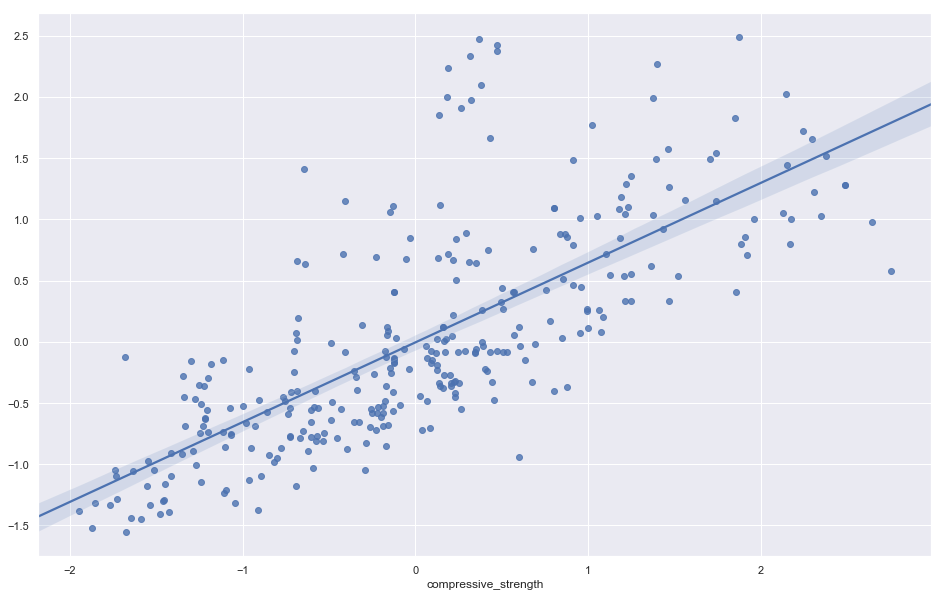

In [378]:
plt.figure(figsize=(16,10))
sns.regplot(y_test, lr_reg_pred);

**Para este conjunto de dados, o algoritmo Linear Regression tem um valor de score igual a 0.53, o que ruim.**

## Decission Tree Regressor

In [379]:
# TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
dt_reg = DecisionTreeRegressor()

dt_reg.fit(X_train,y_train)

dt_pred = dt_reg.predict(X_test)

DT_R2   = metrics.r2_score(y_test, dt_pred)
DT_MSE  = metrics.mean_squared_error(y_test, dt_pred)
DT_RMSE = np.sqrt(metrics.mean_squared_error(y_test, dt_pred))

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
print('Rˆ2 score:',  DT_R2) 
print('Mean Squared Error:', DT_MSE)  
print('Root Mean Squared Error:', DT_RMSE)

Rˆ2 score: 0.8547021302826168
Mean Squared Error: 0.1478885325696766
Root Mean Squared Error: 0.3845627810509964


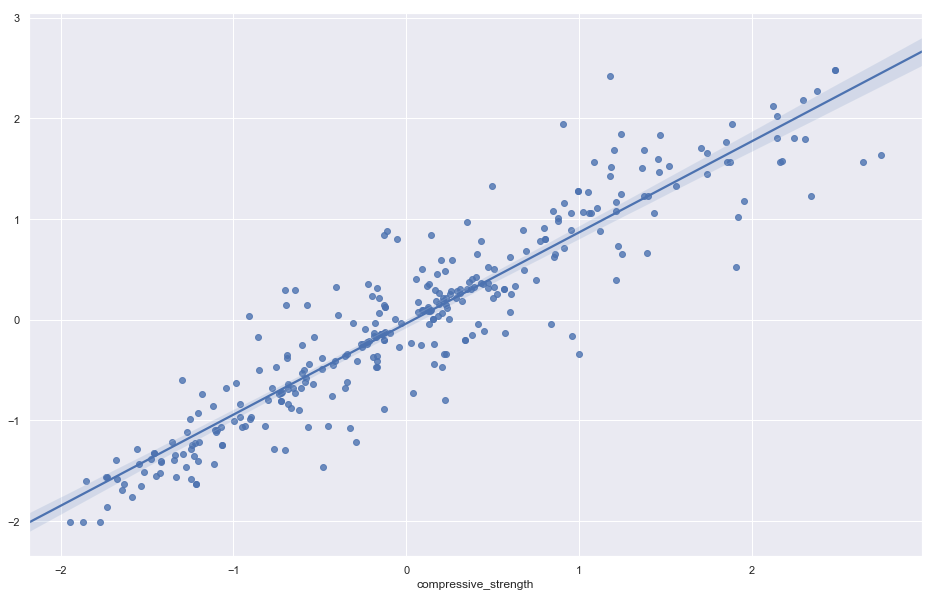

In [380]:
plt.figure(figsize=(16,10))
sns.regplot(y_test, dt_pred);

**Para este conjunto de dados, o algoritmo Decission Tree Regressor tem um valor de score igual a 0.859, o que bom.**

## Suporte Vector Regression

In [381]:
# TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de  treinamento
svr_reg = LinearSVR()

svr_reg.fit(X_train,y_train)

svr_pred = svr_reg.predict(X_test)

SVR_R2   = metrics.r2_score(y_test, svr_pred)
SVR_MSE  = metrics.mean_squared_error(y_test, svr_pred)
SVR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, svr_pred))

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
print('Rˆ2 score:',  SVR_R2) 
print('Mean Squared Error:', SVR_MSE)  
print('Root Mean Squared Error:', SVR_RMSE)

Rˆ2 score: 0.3519076378444308
Mean Squared Error: 0.6596478571587462
Root Mean Squared Error: 0.8121870826101251


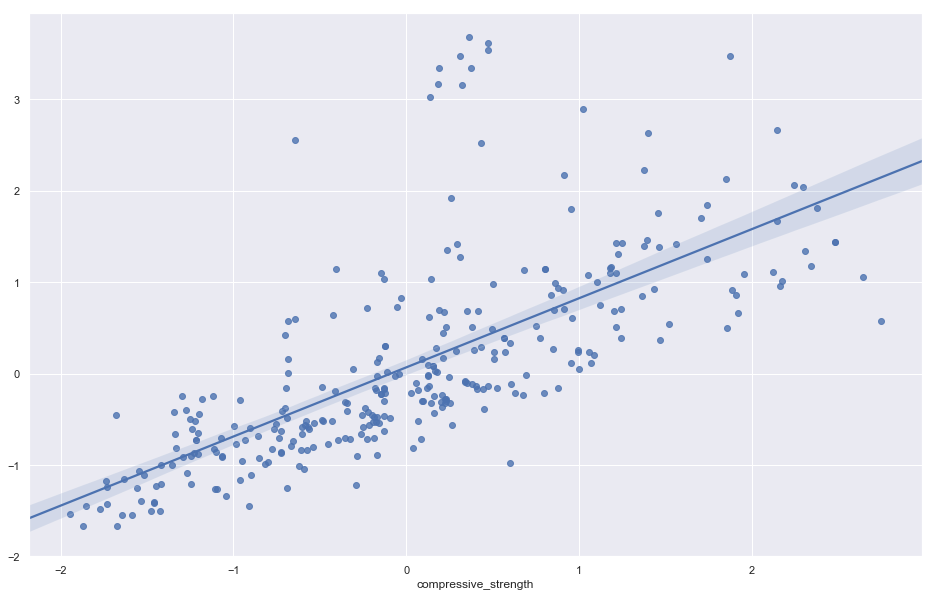

In [382]:
plt.figure(figsize=(16,10))
sns.regplot(y_test, svr_pred);

**Para este conjunto de dados, o algoritmo SVR tem um valor de score igual a 0.352, o que é muito ruim.**

## Random Forest Regression

In [383]:
# TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

rf_pred = rf_reg.predict(X_test)

RF_R2   = metrics.r2_score(y_test, rf_pred)
RF_MSE  = metrics.mean_squared_error(y_test, rf_pred)
RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
print('Rˆ2 score:',  RF_R2) 
print('Mean Squared Error:', RF_MSE)  
print('Root Mean Squared Error:', RF_RMSE)

Rˆ2 score: 0.893451297696304
Mean Squared Error: 0.10844846701156922
Root Mean Squared Error: 0.32931514846962207


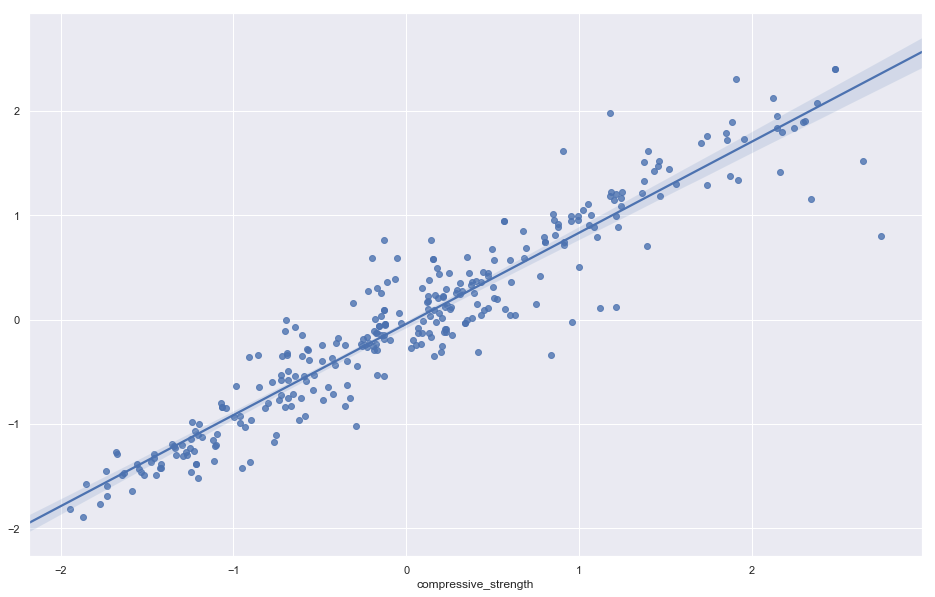

In [384]:
plt.figure(figsize=(16,10))
sns.regplot(y_test, rf_pred);

**Para este conjunto de dados, o algoritmo Random Forest Regression tem um valor de score igual a 0.89, o que é bom.**

## Adaboost Regressor

In [385]:
# TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train,y_train)

ada_pred = ada_reg.predict(X_test)

ADA_R2   = metrics.r2_score(y_test, ada_pred)
ADA_MSE  = metrics.mean_squared_error(y_test, ada_pred)
ADA_RMSE = np.sqrt(metrics.mean_squared_error(y_test, ada_pred))

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
print('Rˆ2 score:',  ADA_R2) 
print('Mean Squared Error:', ADA_MSE)  
print('Root Mean Squared Error:', ADA_RMSE)

Rˆ2 score: 0.7901333842157684
Mean Squared Error: 0.21360854019445355
Root Mean Squared Error: 0.46217803949825825


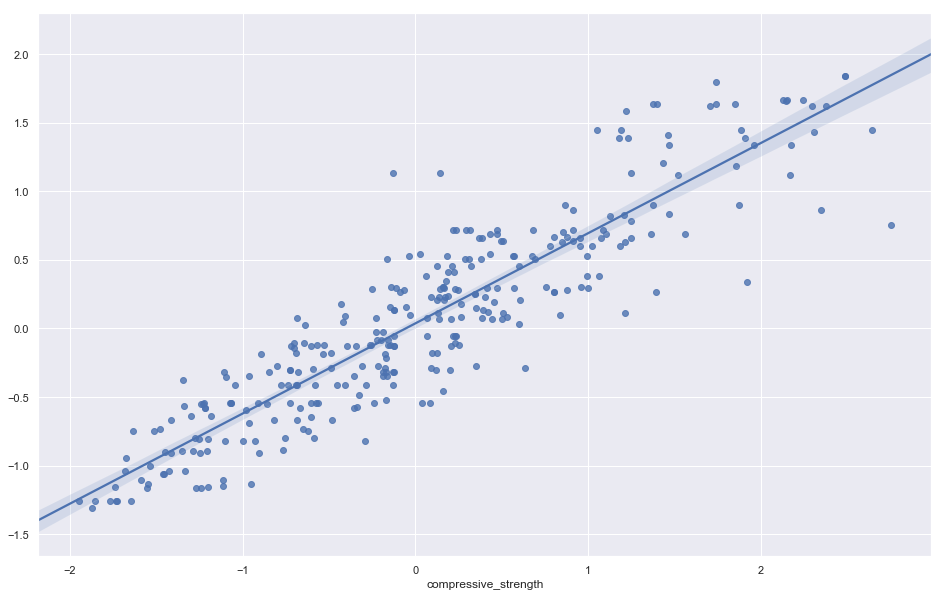

In [386]:
plt.figure(figsize=(16,10))
sns.regplot(y_test, ada_pred);

**Para este conjunto de dados, o algoritmo Adaboost Regressor tem um valor de score igual a 0.797, o que é bom.**

## XGBoost - Extreme Gradient Boosting

In [387]:
# TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
xgb_reg =  xgb.XGBRegressor()
xgb_reg.fit(X_train,y_train)

xgb_pred = xgb_reg.predict(X_test)

XGB_R2   = metrics.r2_score(y_test, xgb_pred)
XGB_MSE  = metrics.mean_squared_error(y_test, xgb_pred)
XGB_RMSE = np.sqrt(metrics.mean_squared_error(y_test, xgb_pred))

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
print('Rˆ2 score:',  XGB_R2) 
print('Mean Squared Error:', XGB_MSE)  
print('Root Mean Squared Error:', XGB_RMSE)

Rˆ2 score: 0.8958105930424323
Mean Squared Error: 0.10604710539961959
Root Mean Squared Error: 0.3256487454292118


**Para este conjunto de dados, o algoritmo XGBoost tem um valor de score igual a 0.896, sem hiperparâmetros configurados o que é bom e muito superior na comparação com o nosso algoritmo de benchmark.**

# Refinamento

In [390]:
# Refinamento ajustando os parametros dos modelos
tune_xgb_reg =  xgb.XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75)

tune_xgb_reg.fit(X_train,y_train)

tune_xgb_pred = tune_xgb_reg.predict(X_test)

TXGB_R2   = metrics.r2_score(y_test, tune_xgb_pred)
TXGB_MSE  = metrics.mean_squared_error(y_test, tune_xgb_pred)
TXGB_RMSE = np.sqrt(metrics.mean_squared_error(y_test, tune_xgb_pred))

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
print('Rˆ2 score:',  TXGB_R2) 
print('Mean Squared Error:', TXGB_MSE)  
print('Root Mean Squared Error:', TXGB_RMSE)

Rˆ2 score: 0.9247688681463798
Mean Squared Error: 0.07657250388480173
Root Mean Squared Error: 0.2767173718522235


## Utilizando Cross Validation

In [447]:
# Criando standardizer
standardizer = StandardScaler()

# Criando um pipeline que padroniza, e roda XGBoost regression
pipeline = make_pipeline(standardizer, tune_xgb_reg)

# Cria k-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Faz k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             X, # Feature 
                             y, # Target 
                             cv=kf, # Técnica Cross-validation 
                             scoring="r2", # Loss function
                             n_jobs=-1) # Use all CPU scores

# Calcula média
cv_results.mean()

0.9357913078746757

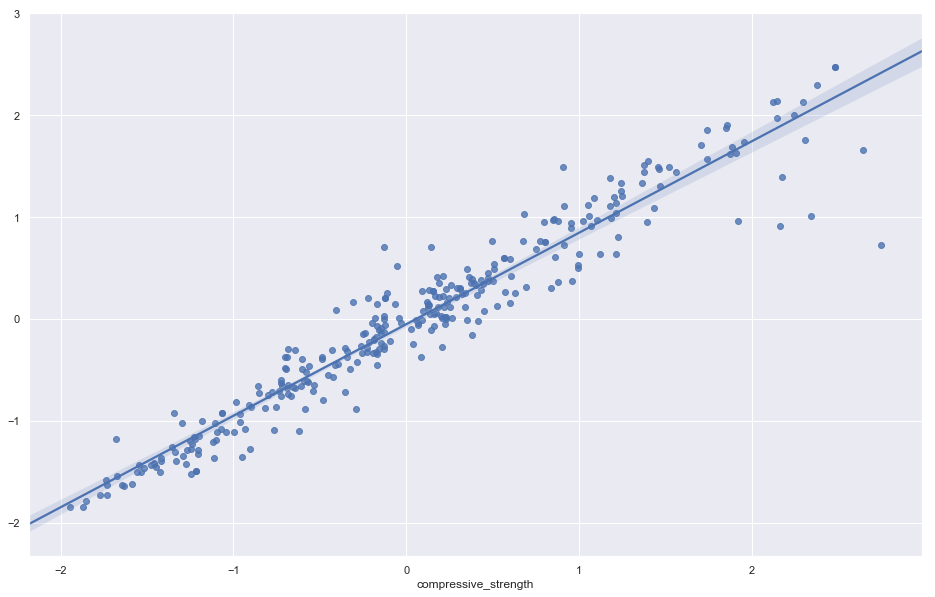

In [412]:
plt.figure(figsize=(16,10))
sns.regplot(y_test, tune_xgb_pred);

**Para este conjunto de dados, o algoritmo XGBoost tem um valor de score igual a 0.924, configuramos os hiperparametros o melhorou o resultado o que é muito bom e o muito superior na comparação com o nosso algoritmo de benchmark.**

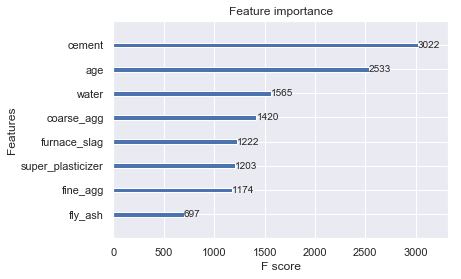

In [355]:
xgb.plot_importance(tune_xgb_reg)
plt.show()

In [362]:
# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch

grid = GridSearchCV(tune_xgb_reg, params)
grid.fit(X, y)

# Print the r2 score
print(r2_score(y_test, grid.best_estimator_.predict(X_test))) 

0.9406445766520733


In [349]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression (Benchmark)', 'Random Forest', 'Decision Trees', 'SVR', 'Adaboost', 'XGBoost'],
    'R2 Score'      : [LR_R2, RF_R2, DT_R2, SVR_R2, ADA_R2, TXGB_R2],
    'MSE'    : [LR_MSE, RF_MSE, DT_MSE, SVR_MSE, ADA_MSE, TXGB_MSE],
    'RMSE'    : [LR_RMSE, RF_RMSE, DT_RMSE, SVR_RMSE, ADA_RMSE, TXGB_RMSE],
    }, columns = ['Model', 'R2 Score', 'MSE', 'RMSE'])

modelDF.sort_values(by='R2 Score', ascending=False)

,Model,R2 Score,MSE,RMSE
5,XGBoost,0.924769,0.076573,0.276717
1,Random Forest,0.894994,0.106878,0.326922
2,Decision Trees,0.853454,0.149159,0.386211
4,Adaboost,0.797294,0.206321,0.454225
0,Linear Regression (Benchmark),0.530816,0.477550,0.691050
3,SVR,0.350488,0.661093,0.813076


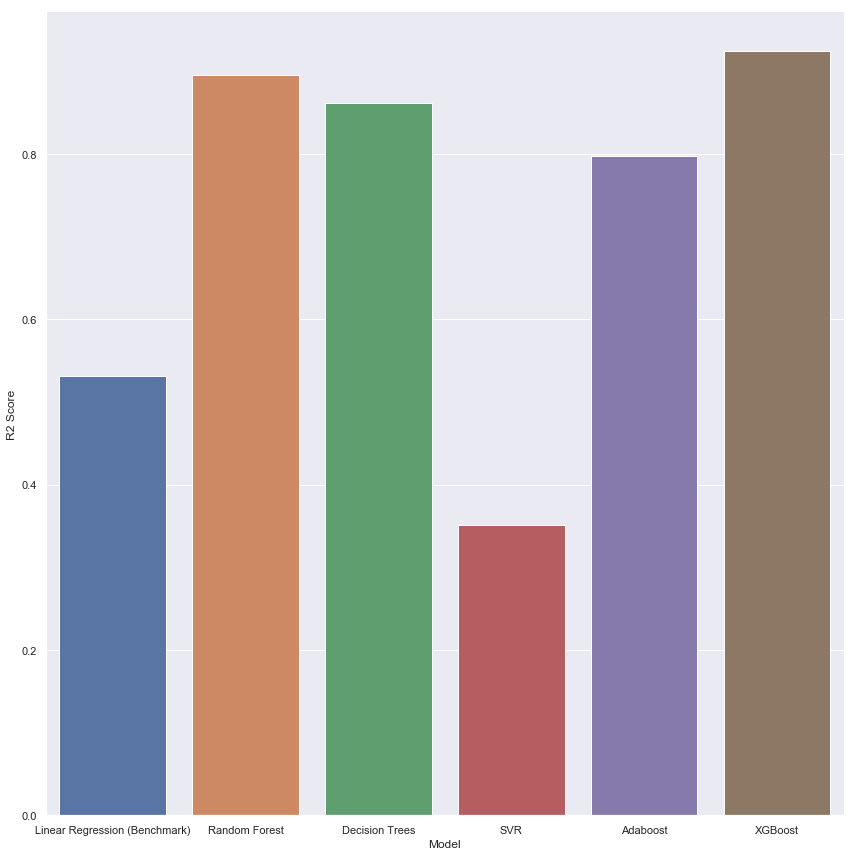

In [325]:
sns.catplot(x= 'Model', y= 'R2 Score', data= modelDF, kind='bar', legend='True', height=12, aspect=1);
plt.savefig('freeform')